In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

In [2]:
X,y=make_regression(n_features=1,n_targets=1,n_informative=1,n_samples=100,noise=20, random_state=13)

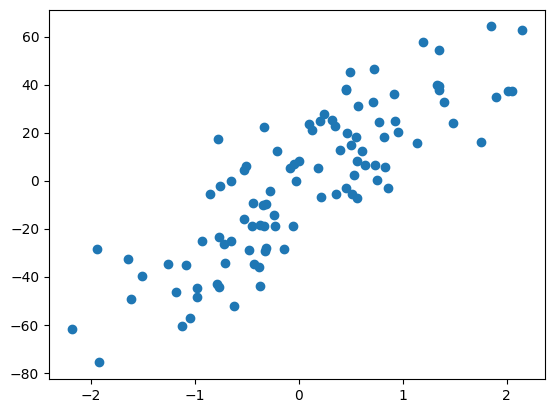

In [3]:
plt.scatter(X,y)

In [4]:
lr=LinearRegression()
lr.fit(X,y)
y_pred=lr.predict(X)
r2_score(y,y_pred)

0.7035182396294911

In [5]:
print(lr.coef_)
print(lr.intercept_)

[27.82809103]
-2.29474455867698


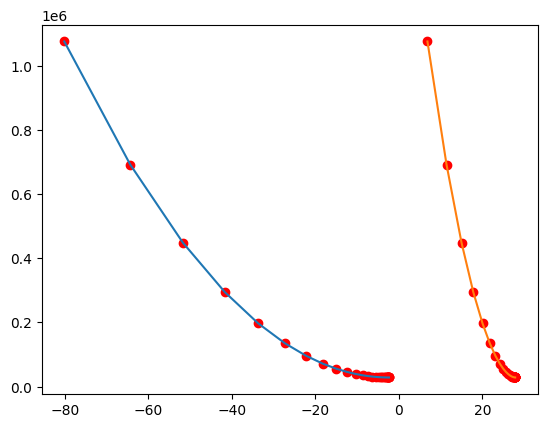

In [6]:
b = -100
m = 1
rate = 0.001
bx = []
cx = []
mx=[]
epocs=30
for i in range(epocs):
    slope_b =  -2*np.sum((y -(m * X.ravel()) -b))
    slope_m=  -2*np.sum((y -(m * X.ravel()) -b)*X.ravel())
    cost = np.sum((y -m * X.ravel() -b) ** 2)
    b=b-rate*slope_b
    m=m-rate*slope_m
    bx.append(b)
    cx.append(cost)
    mx.append(m)
plt.scatter(bx,cx,color='red')
plt.plot(bx,cx)
plt.scatter(mx,cx,color='red')
plt.plot(mx,cx)

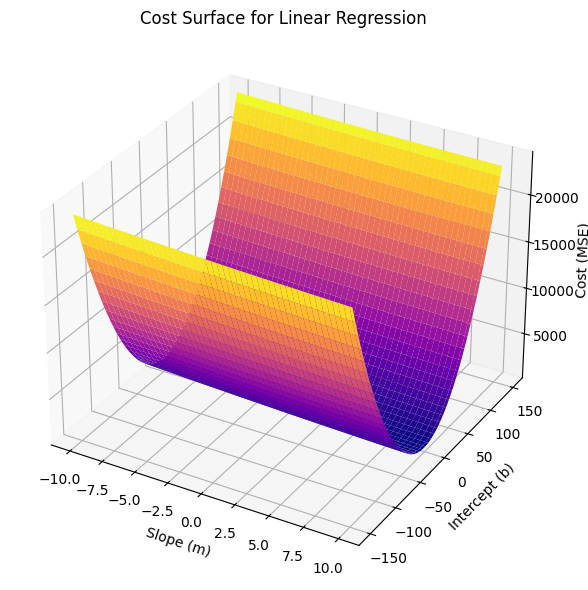

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from mpl_toolkits.mplot3d import Axes3D

# Generate regression data
X, y = make_regression(n_features=1, n_targets=1, n_informative=1, n_samples=100, noise=20, random_state=13)
X = X.ravel()

# Create a grid of slope (m) and intercept (b) values
m_vals = np.linspace(-10, 10, 100)
b_vals = np.linspace(-150, 150, 100)
M, B = np.meshgrid(m_vals, b_vals)

# Compute the cost for each (m, b) pair
Cost = np.zeros_like(M)
for i in range(M.shape[0]):
    for j in range(M.shape[1]):
        y_pred = M[i, j] * X + B[i, j]
        Cost[i, j] = np.mean((y - y_pred) ** 2)

# Plot the 3D surface
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(M, B, Cost, cmap='plasma', edgecolor='none')

# Labels
ax.set_xlabel("Slope (m)")
ax.set_ylabel("Intercept (b)")
ax.set_zlabel("Cost (MSE)")
ax.set_title("Cost Surface for Linear Regression")

plt.tight_layout()
plt.show()